## Лабораторная работа №1
### Выполнила студентка группы ДПИ22-2, Сирина Яна
### Вариант 3

Загрузите данные по вариантам в ноутбук.

In [1]:
import pandas as pd

In [2]:
exam_results = pd.read_excel('var3.xlsx', skiprows=2)
exam_results

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1.0,152.0,11,М,333.0,----001---00---000--1-+0---,0(3)0(3)0(3)0(3)0(3),NaN,3.0,10.000000,36.0
1,2.0,140.0,12,Ж,332.0,----100---01-+-000--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,4.0,14.000000,36.0
2,3.0,137.0,11,М,328.0,--+-010---00---101--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5.0,17.000000,36.0
3,4.0,148.0,11,М,333.0,-+--000--+01---100--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5.0,17.000000,36.0
4,5.0,153.0,11,Ж,333.0,-+--100---00---100-+0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5.0,17.000000,36.0
...,...,...,...,...,...,...,...,...,...,...,...
1176,1177.0,148.0,11,М,330.0,++++222+++22+++222++2++2+++,3(3)3(3)3(3)3(3)2(3),NaN,51.0,98.000000,36.0
1177,1178.0,152.0,11,Ж,330.0,++++222+++22+++222++2++2+++,3(3)3(3)3(3)2(3)3(3),NaN,51.0,98.000000,36.0
1178,1179.0,147.0,11,М,332.0,++++222+++22+++222++2++2+++,3(3)3(3)3(3)3(3)3(3),NaN,52.0,100.000000,36.0
1179,1180.0,148.0,11,М,328.0,++++222+++22+++222++2++2+++,3(3)3(3)3(3)3(3)3(3),NaN,52.0,100.000000,36.0


Сделайте описательную статистику полученных данных.

In [3]:
exam_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   №                              1180 non-null   float64
 1   № школы                        1180 non-null   float64
 2   Класс                          1180 non-null   object 
 3   Пол                            1180 non-null   object 
 4   Номер варианта                 1180 non-null   float64
 5   Задания с кратким ответом      1180 non-null   object 
 6   Задания с развёрнутым ответом  1180 non-null   object 
 7   Устная часть                   1 non-null      object 
 8   Первичный балл                 1180 non-null   float64
 9   Балл                           1181 non-null   float64
 10  Минимальный балл               1180 non-null   float64
dtypes: float64(6), object(5)
memory usage: 101.6+ KB


Найдите процент учащихся, выполнивших работу ниже среднего.

In [4]:
score_column = exam_results["Балл"]
average_score = score_column.mean() # средний результат

total_students = exam_results.shape[0] # общее число студентов
below_average_count = exam_results[score_column < average_score].shape[0] # студенты с баллом ниже среднего
percentage_below_average = (below_average_count / total_students) * 100

print(f"Процент учащихся, выполнивших работу ниже среднего: {percentage_below_average:.2f}%")

Процент учащихся, выполнивших работу ниже среднего: 56.22%


Найти процент учащихся не сдавших экзамен.

In [5]:
min_score_column = exam_results["Минимальный балл"]
failed_count = exam_results[score_column < min_score_column].shape[0] # количство студентов с баллом меньше минимума
percentage_failed = (failed_count / total_students) * 100

print(f"Процент учащихся, не сдавших экзамен: {percentage_failed:.2f}%")

Процент учащихся, не сдавших экзамен: 7.71%


Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.

In [6]:
import matplotlib.pyplot as plt

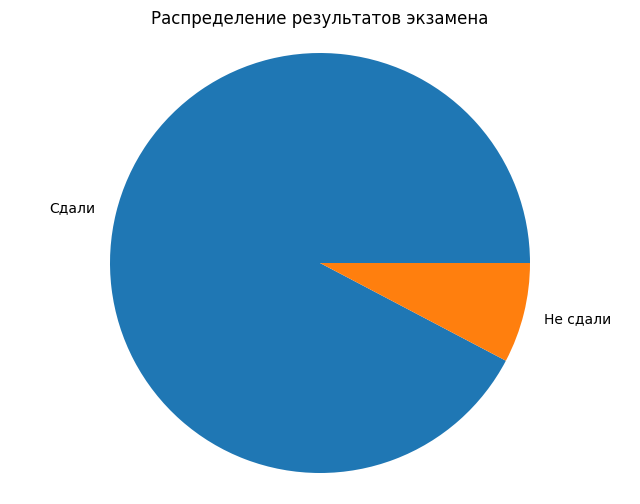

In [7]:
passed_count = total_students - failed_count

plt.figure(figsize=(8, 6))
plt.pie([passed_count, failed_count], labels=['Сдали', 'Не сдали'])
plt.axis('equal')

plt.title("Распределение результатов экзамена")
plt.show()

Постройте ядерную оценку плотности распределению баллов за экзамен.

In [8]:
import seaborn as sns

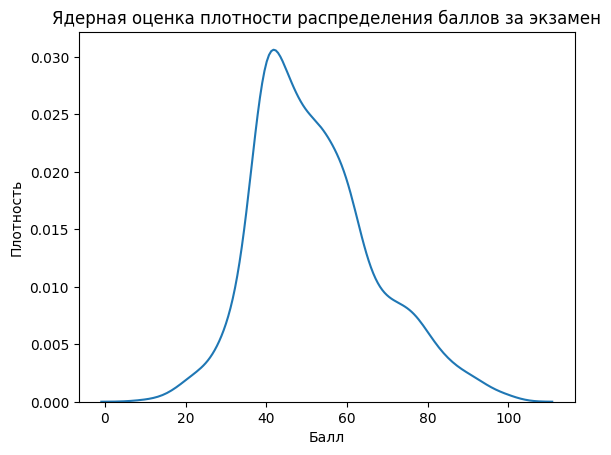

In [9]:
plt.figure()
sns.kdeplot(score_column)
plt.title('Ядерная оценка плотности распределения баллов за экзамен')
plt.xlabel('Балл')
plt.ylabel('Плотность')
plt.show()

Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

In [10]:
# из таблицы https://postupi.online/journal/shkala-perevoda-ballov-ege/shkala-perevoda-ballov-ege-v-ocenki/
EXCELLENT = 73
GOOD = 57
SATISFACTORY = 40

excellent_count = exam_results[score_column >= EXCELLENT].shape[0]
good_count = exam_results[(score_column < EXCELLENT) & (score_column >= GOOD)].shape[0]
satisfactory_count = exam_results[(score_column < GOOD) & (score_column >= SATISFACTORY)].shape[0]
unsatisfactory_count = exam_results[score_column < SATISFACTORY].shape[0]

excellent_percentage = (excellent_count / total_students) * 100
good_percentage = (good_count / total_students) * 100
satisfactory_percentage = (satisfactory_count / total_students) * 100
unsatisfactory_percentage = (unsatisfactory_count / total_students) * 100

print(f"Процент учеников, сдавших экзамен на отлично: {excellent_percentage:.2f}%")
print(f"Процент учеников, сдавших экзамен на хорошо: {good_percentage:.2f}%")
print(f"Процент учеников, сдавших экзамен на удовлетворительно: {satisfactory_percentage:.2f}%")
print(f"Процент учеников, сдавших экзамен на неудовлетворительно: {unsatisfactory_percentage:.2f}%")

Процент учеников, сдавших экзамен на отлично: 10.84%
Процент учеников, сдавших экзамен на хорошо: 23.62%
Процент учеников, сдавших экзамен на удовлетворительно: 46.91%
Процент учеников, сдавших экзамен на неудовлетворительно: 18.63%


Какое процентное соотношение юношей и девушек писало данный экзамен?

In [11]:
gender_column = exam_results["Пол"]

male_count = exam_results[gender_column == 'М'].shape[0]
female_count = exam_results[gender_column == 'Ж'].shape[0]

male_percentage = (male_count / total_students) * 100
female_percentage = (female_count / total_students) * 100

print(f"Процент юношей, писавших экзамен: {male_percentage:.2f}%")
print(f"Процент девушек, писавших экзамен: {female_percentage:.2f}%")

Процент юношей, писавших экзамен: 68.59%
Процент девушек, писавших экзамен: 31.33%


Сколько школ принимало участие в экзамене?

In [12]:
school_column = exam_results["№ школы"]
unique_schools_count = school_column.nunique() # количество уникальных значение в столбце
unique_schools_count

19

Сколько всего заданий с кратким ответом? С развернутым ответом?

In [13]:
first_row = exam_results.iloc[0] # в качестве примера возьмем первую строку

short_tasks_count = len(first_row["Задания с кратким ответом"])
long_tasks_count = first_row["Задания с развёрнутым ответом"].count(')')

print(f"Количество заданий с кратким ответом: {short_tasks_count}")
print(f"Количество заданий с развёрнутым ответом: {long_tasks_count}")

Количество заданий с кратким ответом: 27
Количество заданий с развёрнутым ответом: 5


Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В1, ... Вк
Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.

In [14]:
short_answer_column = exam_results["Задания с кратким ответом"]
tasks_count = len(short_answer_column[0]) # количество заданий

# список, в который мы будем записывать количество правильных решений для каждого задания
completed_counts = [0] * tasks_count

# заполним списки с количеством ответов
for entry in short_answer_column:
    for i, char in enumerate(str(entry)):
        if char not in ['-', '0']:
            completed_counts[i] += 1

total_entries = len(short_answer_column) # общее количество решений
for i in range(tasks_count):
    completed_percentage = (completed_counts[i] / total_entries) * 100
    not_completed_percentage = 100 - completed_percentage
    print(f'В задании B{i + 1} процент правильных решений - {completed_percentage:.2f}, а неправильных {not_completed_percentage:.2f}')

В задании B1 процент правильных решений - 85.35, а неправильных 14.65
В задании B2 процент правильных решений - 86.88, а неправильных 13.12
В задании B3 процент правильных решений - 62.24, а неправильных 37.76
В задании B4 процент правильных решений - 44.45, а неправильных 55.55
В задании B5 процент правильных решений - 82.90, а неправильных 17.10
В задании B6 процент правильных решений - 82.81, а неправильных 17.19
В задании B7 процент правильных решений - 80.86, а неправильных 19.14
В задании B8 процент правильных решений - 65.54, а неправильных 34.46
В задании B9 процент правильных решений - 73.92, а неправильных 26.08
В задании B10 процент правильных решений - 34.97, а неправильных 65.03
В задании B11 процент правильных решений - 83.74, а неправильных 16.26
В задании B12 процент правильных решений - 75.28, а неправильных 24.72
В задании B13 процент правильных решений - 56.56, а неправильных 43.44
В задании B14 процент правильных решений - 50.97, а неправильных 49.03
В задании B15 п

Аналогично и с типом С (ответы с развернутым ответом)

In [15]:
long_answer_column = exam_results['Задания с развёрнутым ответом']
tasks_count = long_answer_column.iloc[0].count(')')

completed_counts = [0] * tasks_count

for entry in long_answer_column:
    entry = str(entry)
    tasks = entry.split(')')[:-1]
    for i, task in enumerate(tasks):
        score = int(task.split('(')[0])
        if score != 0:
            completed_counts[i] += 1

total_entries = len(long_answer_column)
for i in range(tasks_count):
    completed_percentage = (completed_counts[i] / total_entries) * 100
    not_completed_percentage = 100 - completed_percentage
    print(f'В задании C{i + 1} процент правильных решений - {completed_percentage:.2f}, а неправильных {not_completed_percentage:.2f}')

В задании C1 процент правильных решений - 17.61, а неправильных 82.39
В задании C2 процент правильных решений - 38.19, а неправильных 61.81
В задании C3 процент правильных решений - 16.34, а неправильных 83.66
В задании C4 процент правильных решений - 23.37, а неправильных 76.63
В задании C5 процент правильных решений - 31.75, а неправильных 68.25


Сделайте анализ по двум школам:
1. по всем выполненным заданиям типа В
2. по заданиям типа С больше 50%
3. по среднему баллу юношей и девушек

In [16]:
import statistics

In [17]:
school_number_1 = 152
school_number_2 = 140

needed_columns = ['Пол', 'Задания с кратким ответом', 'Задания с развёрнутым ответом', 'Балл']
school_data_1 = exam_results[school_column == school_number_1][needed_columns]
school_data_2 = exam_results[school_column == school_number_2][needed_columns]

По всем выполненным заданиям типа В:

In [18]:
def get_b_statistics(tasks_data):
    tasks_count = len(tasks_data.iloc[0]['Задания с кратким ответом'])
    completed_counts = [0] * tasks_count
    total_entries = len(tasks_data)

    for entry in tasks_data['Задания с кратким ответом']:
        for i, char in enumerate(str(entry)):
            if char in ['-', '0']:
                completed_counts[i] += 1

    completed_percents = [(count / total_entries) * 100 for count in completed_counts]
    completed_percent = statistics.mean(completed_percents)

    return completed_percent

In [19]:
print(f'Процент выполнения заданий типа В в школе №{school_number_1}: {get_b_statistics(school_data_1)}')
print(f'Процент выполнения заданий типа В в школе №{school_number_2}: {get_b_statistics(school_data_2)}')

Процент выполнения заданий типа В в школе №152: 32.35294117647059
Процент выполнения заданий типа В в школе №140: 35.528120713305896


По заданиям типа С:

In [20]:
def get_c_statistics(tasks_data):
    long_tasks_column = tasks_data['Задания с развёрнутым ответом']
    tasks_count = long_tasks_column.iloc[0].count(')')

    total_completed = 0
    total_questions = 0

    for entry in long_tasks_column:
        entry = str(entry)
        tasks = entry.split(')')[:-1]
        for task in tasks:
            score = int(task.split('(')[0])
            if score >= 2:
                total_completed += 1
            total_questions += 1

    completed_percent = total_completed / total_questions * 100
    return completed_percent

In [21]:
print(f'Процент выполнения заданий типа С в школе №{school_number_1}: {get_c_statistics(school_data_1)}')
print(f'Процент выполнения заданий типа С в школе №{school_number_2}: {get_c_statistics(school_data_2)}')

Процент выполнения заданий типа С в школе №152: 17.41176470588235
Процент выполнения заданий типа С в школе №140: 6.074074074074074


По среднему баллу юношей и девушек:

In [22]:
def get_average_scores_by_genders(tasks_data):
    gender_column = tasks_data['Пол']
    male_scores = tasks_data[gender_column == 'М']['Балл']
    female_scores = tasks_data[gender_column == 'Ж']['Балл']
    male_avg_score = male_scores.mean()
    female_avg_score = female_scores.mean()
    return male_avg_score, female_avg_score

In [23]:
male_score_school_1, female_score_school_1 = get_average_scores_by_genders(school_data_1)
male_score_school_2, female_score_school_2 = get_average_scores_by_genders(school_data_2)

print(f'Средний балл юношей из школы №{school_number_1}: {male_score_school_1}')
print(f'Средний балл девушек из школы №{school_number_1}: {female_score_school_1}')
print(f'Средний балл юношей из школы №{school_number_2}: {male_score_school_2}')
print(f'Средний балл девушек из школы №{school_number_2}: {female_score_school_2}')

Средний балл юношей из школы №152: 53.89915966386555
Средний балл девушек из школы №152: 58.11764705882353
Средний балл юношей из школы №140: 50.64835164835165
Средний балл девушек из школы №140: 49.54545454545455
